In [7]:
#Load the .json file available in the same directory as this script
import json
import os

#Get the current working directory
cwd = os.getcwd()

#Open the file mape_values.json
with open(cwd + '/mape_values.json') as f:
    mape_data = json.load(f)

#Open the file rsme_values.json
with open(cwd + '/rsme_values.json') as f:
    rmse_data = json.load(f)


#Print the head of the data
print(mape_data)
print(rmse_data)

#Convert the data to a pandas dataframe and pivot it
import pandas as pd
mape_df = pd.DataFrame(mape_data, index=[0]).T
rmse_df = pd.DataFrame(rmse_data, index=[0]).T

#Moving the index to a column
mape_df.reset_index(inplace=True)
rmse_df.reset_index(inplace=True)

#Renaming the columns
mape_df.columns = ['Model', 'MAPE Score']
rmse_df.columns = ['Model', 'RMSE Score']

#Defining model as a string
mape_df['Model'] = mape_df['Model'].astype(str)
rmse_df['Model'] = rmse_df['Model'].astype(str)

#Splitting the model column by the underscore
mape_df[['Forecast Method', 'Number of Indicators', 'Test Period', 'Model']] = mape_df['Model'].str.split('_', expand=True)
rmse_df[['Forecast Method', 'Number of Indicators', 'Test Period', 'Model']] = rmse_df['Model'].str.split('_', expand=True)

#Combining 'Forecast Method', 'Number of Indicators', 'Test Period' as a single column called 'Scenario'
mape_df['Scenario'] = mape_df['Forecast Method'] + '_' + mape_df['Number of Indicators'] + '_' + mape_df['Test Period']
rmse_df['Scenario'] = rmse_df['Forecast Method'] + '_' + rmse_df['Number of Indicators'] + '_' + rmse_df['Test Period']

#Replacing the values in the 'Scenario' column
mape_df['Scenario'] = mape_df['Scenario'].str.replace('Multi_All_Post', 'All Responses, Post Covid')
mape_df['Scenario'] = mape_df['Scenario'].str.replace('Multi_All_Pre', 'All Responses, Pre Covid')
mape_df['Scenario'] = mape_df['Scenario'].str.replace('Multi_Single_Post', 'Indicator, Post Covid')
mape_df['Scenario'] = mape_df['Scenario'].str.replace('Multi_Single_Pre', 'Indicator, Pre Covid')
mape_df['Scenario'] = mape_df['Scenario'].str.replace('Multi_UniVar_Post', 'Univariate, Post Covid')
mape_df['Scenario'] = mape_df['Scenario'].str.replace('Multi_UniVar_Pre', 'Univariate, Pre Covid')

mape_df['Scenario'] = mape_df['Scenario'].str.replace('One_All_Post', 'All Responses, Post Covid')
mape_df['Scenario'] = mape_df['Scenario'].str.replace('One_All_Pre', 'All Responses, Pre Covid')
mape_df['Scenario'] = mape_df['Scenario'].str.replace('One_Single_Post', 'Indicator, Post Covid')
mape_df['Scenario'] = mape_df['Scenario'].str.replace('One_Single_Pre', 'Indicator, Pre Covid')
mape_df['Scenario'] = mape_df['Scenario'].str.replace('One_UniVar_Post', 'Univariate, Post Covid')
mape_df['Scenario'] = mape_df['Scenario'].str.replace('One_UniVar_Pre', 'Univariate, Pre Covid')

rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('Multi_All_Post', 'All Responses, Post Covid')
rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('Multi_All_Pre', 'All Responses, Pre Covid')
rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('Multi_Single_Post', 'Indicator, Post Covid')
rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('Multi_Single_Pre', 'Indicator, Pre Covid')
rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('Multi_UniVar_Post', 'Univariate, Post Covid')
rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('Multi_UniVar_Pre', 'Univariate, Pre Covid')

rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('One_All_Post', 'All Responses, Post Covid')
rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('One_All_Pre', 'All Responses, Pre Covid')
rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('One_Single_Post', 'Indicator, Post Covid')
rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('One_Single_Pre', 'Indicator, Pre Covid')
rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('One_UniVar_Post', 'Univariate, Post Covid')
rmse_df['Scenario'] = rmse_df['Scenario'].str.replace('One_UniVar_Pre', 'Univariate, Pre Covid')


#Printing unique values of the 'Scenario' column
print(mape_df['Scenario'].unique())
print(rmse_df['Scenario'].unique())

{'Multi_All_Post_ARIMAX': 7.389131631641938, 'Multi_All_Post_SARIMAX': 7.584910695964753, 'Multi_All_Post_GB': 9.086349709280165, 'Multi_All_Post_RNN': 6.729630148718865, 'Multi_All_Post_LSTM': 8.930791912920204, 'Multi_All_Pre_ARIMAX': 2.911387595239935, 'Multi_All_Pre_SARIMAX': 3.044747611784285, 'Multi_All_Pre_GB': 2.641139702373619, 'Multi_All_Pre_RNN': 3.8075649917759637, 'Multi_All_Pre_LSTM': 2.8032115956087766, 'Multi_Single_Pre_ARIMAX': 2.911387595239935, 'Multi_Single_Pre_SARIMAX': 3.044747611784285, 'Multi_Single_Pre_RNN': 3.5683186453720594, 'Multi_Single_Pre_LSTM': 3.416389944992235, 'Multi_Single_Pre_GB': 7.476648993668356, 'Multi_Single_Post_ARIMAX': 7.389131631641938, 'Multi_Single_Post_SARIMAX': 7.584910695964753, 'Multi_Single_Post_GB': 7.555428430186767, 'Multi_Single_Post_RNN': 9.525931421178646, 'Multi_Single_Post_LSTM': 7.050474561953416, 'One_All_Post_ARIMAX': 3.924223979590787, 'One_All_Post_RNN': 4.499385285257393, 'One_All_Post_LSTM': 4.548138377202492, 'One_Al

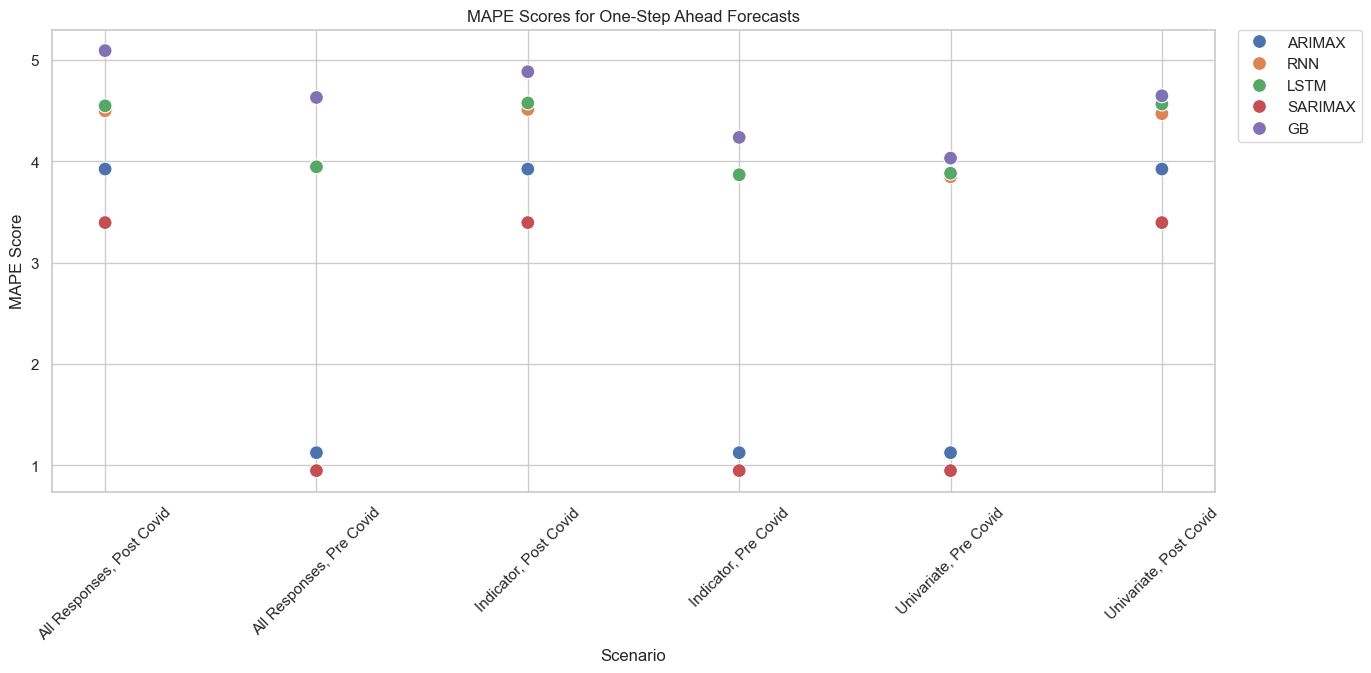

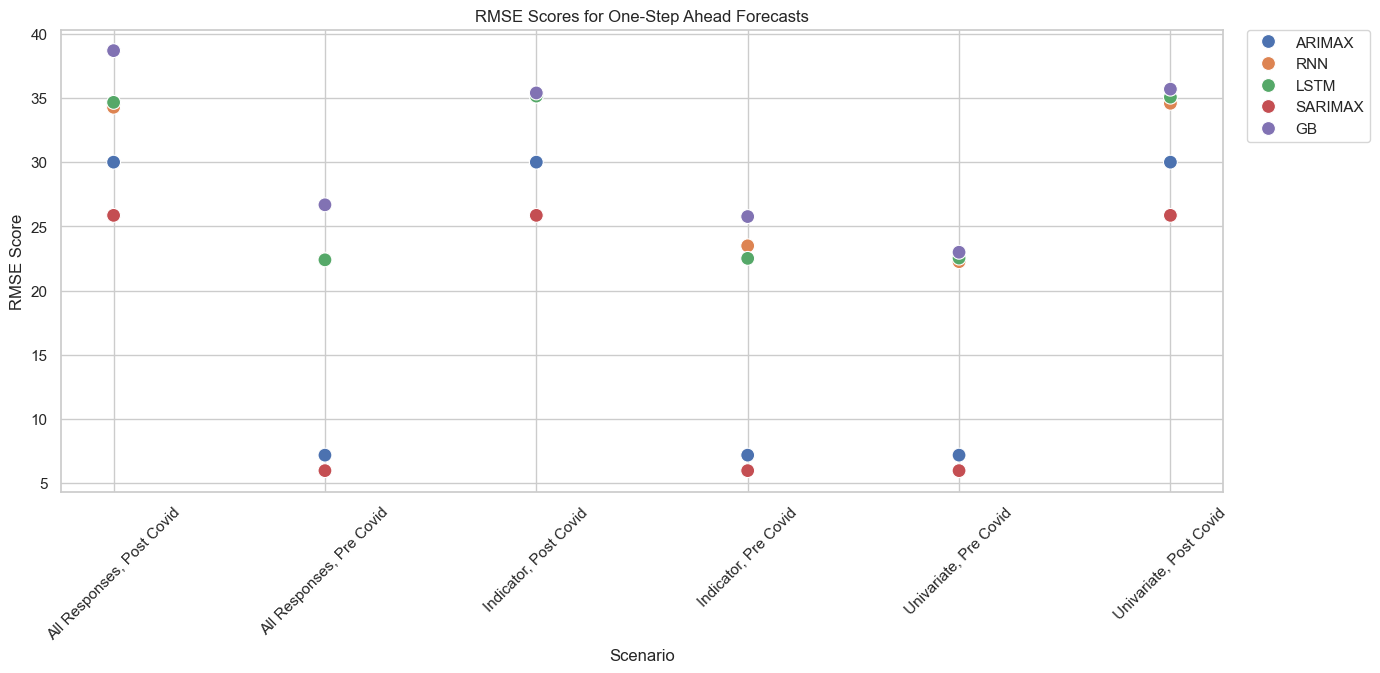

In [8]:
#Plotting the one-step ahead forecasts
##Starting by filtering the data where Forecast Method is equal to 'one'

mape_df_one = mape_df[mape_df['Forecast Method'] == 'One']
rmse_df_one = rmse_df[rmse_df['Forecast Method'] == 'One']

#Plotting the MAPE scores
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Plot the scatterplot
ax = sns.scatterplot(x='Scenario', y='MAPE Score', hue='Model', data=mape_df_one, s=100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('MAPE Scores for One-Step Ahead Forecasts')
plt.xlabel('Scenario')
plt.ylabel('MAPE Score')

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('one_step_ahead_forecasts_mape.png', bbox_inches='tight')
plt.show()


#Plotting the RMSE scores
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Plot the scatterplot
ax = sns.scatterplot(x='Scenario', y='RMSE Score', hue='Model', data=rmse_df_one, s=100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('RMSE Scores for One-Step Ahead Forecasts')
plt.xlabel('Scenario')
plt.ylabel('RMSE Score')

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('one_step_ahead_forecasts_rsme.png', bbox_inches='tight')
plt.show()

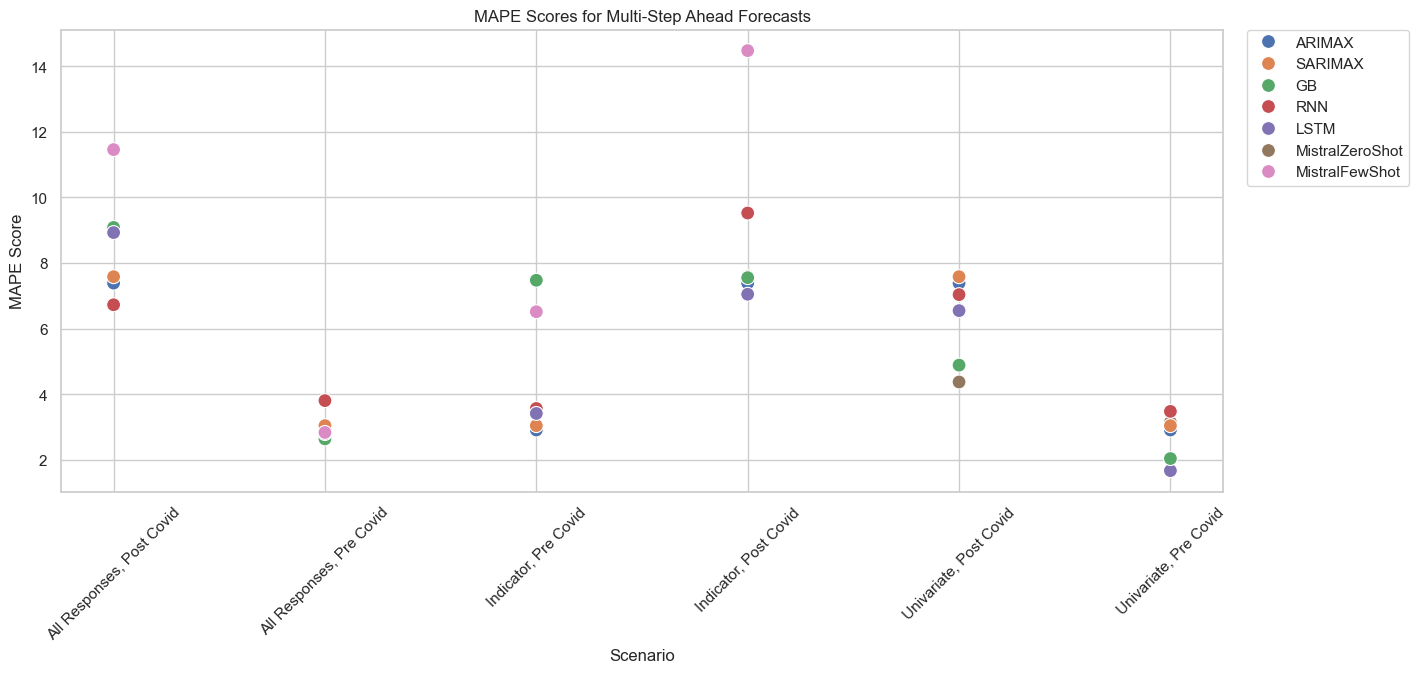

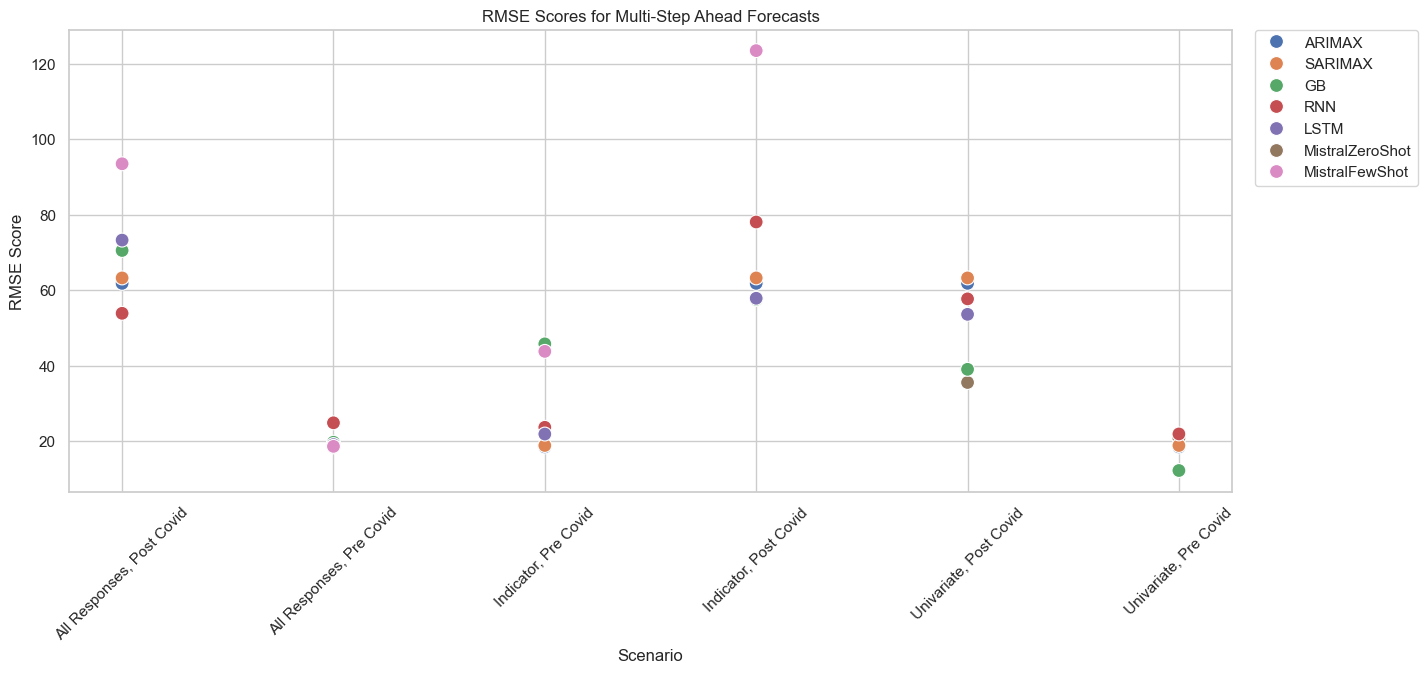

In [9]:
#Plotting the multi-step ahead forecasts
##Starting by filtering the data where Forecast Method is equal to 'multi'

mape_df_multi = mape_df[mape_df['Forecast Method'] == 'Multi']
rmse_df_multi = rmse_df[rmse_df['Forecast Method'] == 'Multi']

#Plotting the MAPE scores
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Plot the scatterplot
ax = sns.scatterplot(x='Scenario', y='MAPE Score', hue='Model', data=mape_df_multi, s=100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('MAPE Scores for Multi-Step Ahead Forecasts')
plt.xlabel('Scenario')
plt.ylabel('MAPE Score')

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('multi_step_ahead_forecasts_mape.png', bbox_inches='tight')
plt.show()

#Plotting the RMSE scores
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Plot the scatterplot
ax = sns.scatterplot(x='Scenario', y='RMSE Score', hue='Model', data=rmse_df_multi, s=100)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('RMSE Scores for Multi-Step Ahead Forecasts')
plt.xlabel('Scenario')
plt.ylabel('RMSE Score')

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('multi_step_ahead_forecasts_rsme.png', bbox_inches='tight')
plt.show()